In [18]:
# 定义文件路径
file_path = r'D:\Project\Convert_Dataset\轨迹预测数据\filtered_data.txt'

# 初始化数据条目计数器
data_entries_count = 0

# 尝试打开并读取文件
try:
    with open(file_path, 'r') as file:
        # 逐行读取文件内容
        for line in file:
            # 忽略空行
            if line.strip():  # 如果行不为空，即包含数据
                data_entries_count += 1

    # 打印数据条目数量
    print(f"文件中包含的数据条目数量为: {data_entries_count}")

except FileNotFoundError:
    print(f"文件 {file_path} 未找到。")
except Exception as e:
    print(f"读取文件时发生错误: {e}")

文件中包含的数据条目数量为: 3520


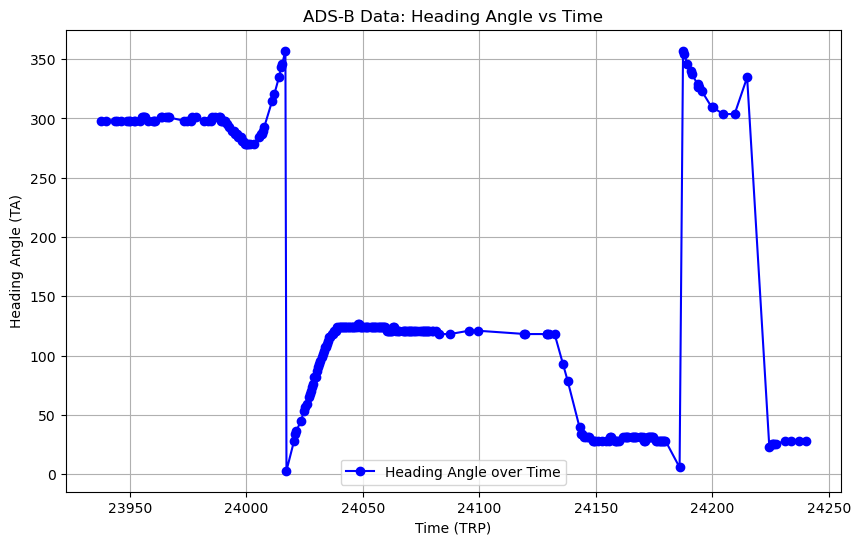

In [27]:
import numpy as np
import matplotlib.pyplot as plt
import json

# 定义文件路径
file_path = r'D:\Project\Convert_Dataset\轨迹预测数据\filter_ADSB_2\20220701_1.txt'

# 初始化用于存储数据的列表
headings = []
time_stamps = []

# 尝试打开并读取文件
try:
    with open(file_path, 'r') as file:
        # 整个文件是一个JSON数组，我们一次性加载它
        data = json.load(file)
        
        # 提取航向角和时间戳数据
        for record in data:
            if 'TA' in record and 'TRP' in record:
                headings.append(record['TA'])
                time_stamps.append(record['TRP'])

    # 将时间戳和航向角转换为数值类型
    time_stamps = np.array(time_stamps, dtype=float)
    headings = np.array(headings, dtype=float)

    # 根据时间戳对数据进行排序
    sorted_indices = np.argsort(time_stamps)
    sorted_time_stamps = time_stamps[sorted_indices]
    sorted_headings = headings[sorted_indices]

    # 创建图形并绘制航向角随时间变化的线
    plt.figure(figsize=(10, 6))
    plt.plot(sorted_time_stamps, sorted_headings, marker='o', linestyle='-', color='blue', label='Heading Angle over Time')

    plt.xlabel('Time (TRP)')
    plt.ylabel('Heading Angle (TA)')
    plt.title('ADS-B Data: Heading Angle vs Time')
    plt.grid(True)
    plt.legend()
    plt.show()

except FileNotFoundError:
    print(f"文件 {file_path} 未找到。")
except json.JSONDecodeError:
    print("文件内容不是有效的JSON格式。")
except Exception as e:
    print(f"读取文件时发生错误: {e}")

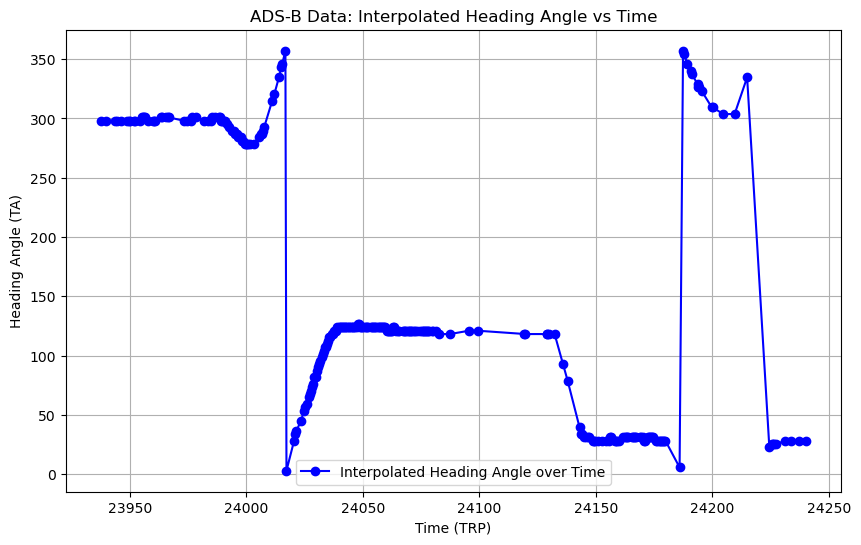

# 判断增加地速和方向角的数据是否对应的上

In [46]:
import json

def check_correspondence(file_path_1, file_path_2):
    with open(file_path_1, 'r') as file_1, open(file_path_2, 'r') as file_2:
        data_1 = json.load(file_1)
        data_2 = json.load(file_2)

        # 检查除了'GS'和'TA'字段之外，其他数据是否一致
        for item_1, item_2 in zip(data_1, data_2):
            item_1.pop("GS", None)
            item_1.pop("TA", None)
            item_2.pop("GS", None)
            item_2.pop("TA", None)

            if item_1 != item_2:
                print("数据不一致")
                return

        print("数据一致")

# 检查两个文件的内容是否一致
check_correspondence(
    r'D:\Project\Convert_Dataset\轨迹预测数据\filter_ADSB_2\20220701_4.txt',
    r'D:\Project\Convert_Dataset\轨迹预测数据\filter_ADSB\20220701_4.txt'
)


数据一致


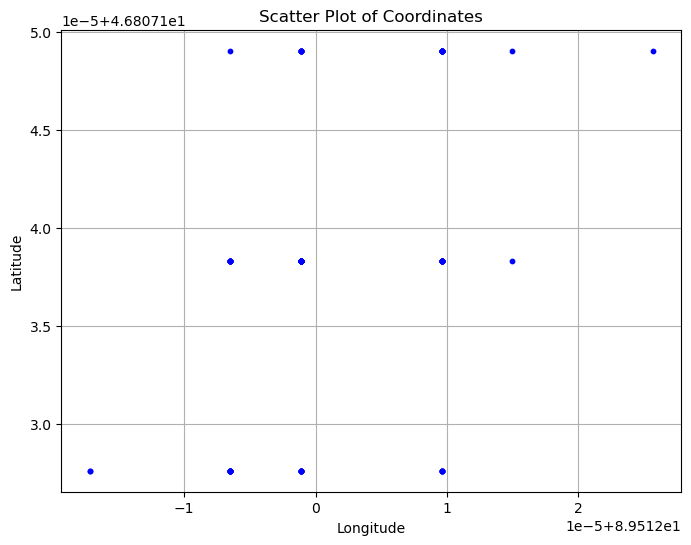

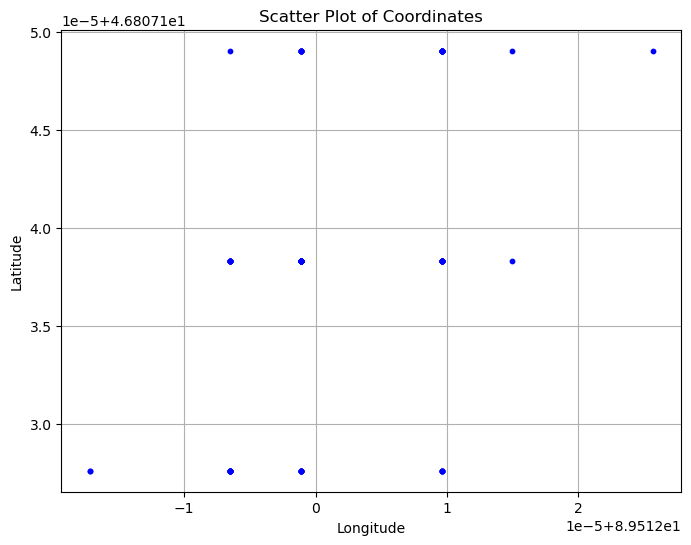

In [57]:
import json
import matplotlib.pyplot as plt

def plot_coordinates(file_path):
    with open(file_path, 'r') as file:
        data = json.load(file)

    # 提取经纬度数据
    lons = [item["LON"] for item in data]
    lats = [item["LAT"] for item in data]

    # 绘制散点图
    plt.figure(figsize=(8, 6))
    plt.scatter(lons, lats, s=10, color='blue')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.title('Scatter Plot of Coordinates')
    plt.grid(True)
    plt.show()

# 绘制文件1的经纬度数据
plot_coordinates(r'D:\Project\Convert_Dataset\轨迹预测数据\filter_ADSB_2\20220729_2.txt')

# 绘制文件2的经纬度数据
plot_coordinates(r'D:\Project\Convert_Dataset\轨迹预测数据\filter_ADSB\20220729_2.txt')


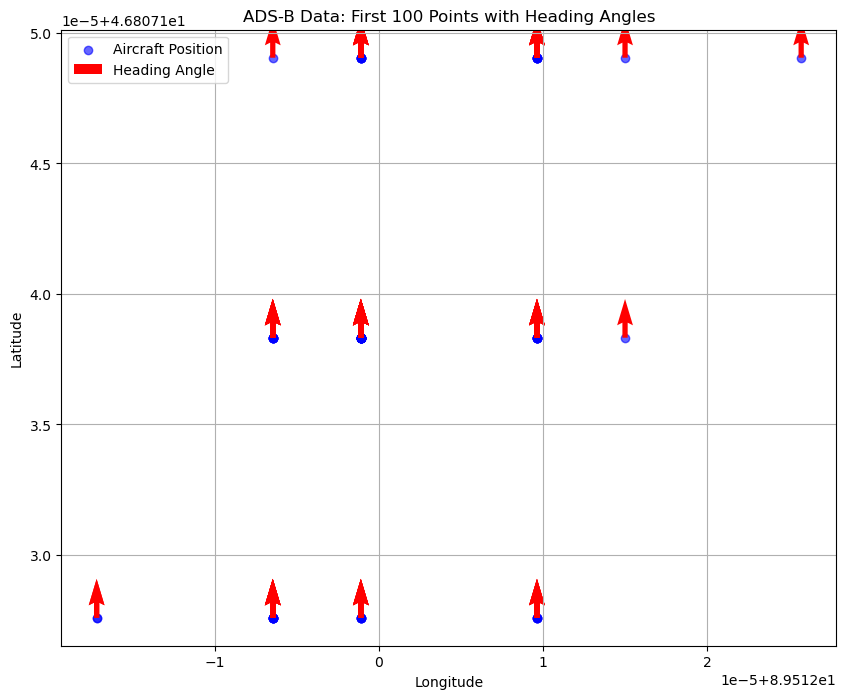

In [58]:
import numpy as np
import matplotlib.pyplot as plt
import json

# 定义文件路径
file_path = r'D:\Project\Convert_Dataset\轨迹预测数据\filter_ADSB_2\20220729_2.txt'

# 初始化用于存储数据的列表
lons = []
lats = []
headings = []

# 尝试打开并读取文件
try:
    with open(file_path, 'r') as file:
        # 整个文件是一个JSON数组，我们一次性加载它
        data = json.load(file)
        
        # 只处理前一百个数据记录
        for record in data[:]:
            # 确保我们获取了所需的所有数据
            if all(key in record for key in ['LON', 'LAT', 'TA']):
                lons.append(record['LON'])
                lats.append(record['LAT'])
                headings.append(record['TA'])

    # 将航向角转换为弧度
    headings_rad = np.radians(headings)

    # 计算箭头的位置和方向
    arrow_length = 50  # 根据实际情况调整箭头长度
    dx = arrow_length * np.sin(headings_rad)
    dy = arrow_length * np.cos(headings_rad)

    # 创建一个新的图形
    plt.figure(figsize=(10, 8))

    # 绘制经度和纬度的散点图
    plt.scatter(lons, lats, color='blue', alpha=0.6, label='Aircraft Position')

    # 添加箭头表示航向角方向
    plt.quiver(lons, lats, dx, dy, color='red', scale=1000, label='Heading Angle')

    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.title('ADS-B Data: First 100 Points with Heading Angles')
    plt.grid(True)
    plt.legend()
    plt.show()

except FileNotFoundError:
    print(f"文件 {file_path} 未找到。")
except json.JSONDecodeError:
    print("文件内容不是有效的JSON格式。")
except Exception as e:
    print(f"读取文件时发生错误: {e}")

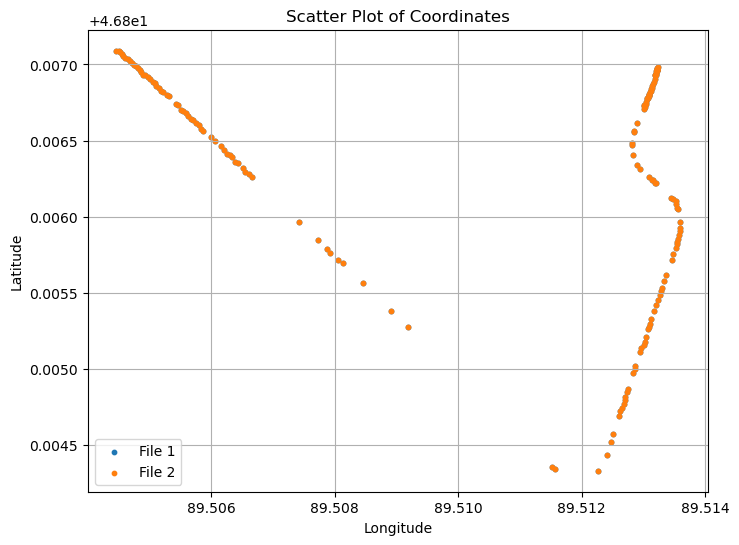

In [55]:
import json
import matplotlib.pyplot as plt

def plot_coordinates(file_paths, labels):
    plt.figure(figsize=(8, 6))
    for file_path, label in zip(file_paths, labels):
        with open(file_path, 'r') as file:
            data = json.load(file)

        # 提取经纬度数据
        lons = [item["LON"] for item in data]
        lats = [item["LAT"] for item in data]

        # 绘制散点图
        plt.scatter(lons, lats, s=10, label=label)

    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.title('Scatter Plot of Coordinates')
    plt.grid(True)
    plt.legend()
    plt.show()

# 两个文件的路径
file_paths = [
    r'D:\Project\Convert_Dataset\轨迹预测数据\filter_ADSB_2\20220706_1.txt',
    r'D:\Project\Convert_Dataset\轨迹预测数据\filter_ADSB\20220706_1.txt'
]

# 对应的标签
labels = ['File 1', 'File 2']

# 绘制两个文件中的经纬度数据
plot_coordinates(file_paths, labels)


In [10]:
import os

# 定义需要筛选的ADDR和CS值
target_addr = "780CE8"
target_cs = "CSC6589"

# 原始数据文件路径
input_file_path = "D:\\Project\\Convert_Dataset\\轨迹预测数据\\result_ADSB\\20220701.txt"

# 输出文件保存路径
output_file_path = "D:\\Project\\Convert_Dataset\\轨迹预测数据\\filtered_ADSB_data.txt"

# 检查输入文件是否存在
if not os.path.isfile(input_file_path):
    print(f"文件 {input_file_path} 不存在。")
else:
    # 读取原始数据文件
    with open(input_file_path, 'r') as file:
        data_lines = file.readlines()

    # 筛选特定数据并写入新文件
    with open(output_file_path, 'w') as output_file:
        for line in data_lines:
            # 解析每一行数据中的ADDR和CS值
            addr = next((v for k, v in (line.split(",") for line in line.split("{") if "ADDR" in line) if v.startswith('"' + target_addr + '"')), None)
            cs = next((v for k, v in (line.split(",") for line in line.split("{") if "CS" in line) if v.startswith('"' + target_cs + '"')), None)
            # 如果行中同时包含目标ADDR和CS，则写入新文件
            if addr == target_addr and cs == target_cs:
                output_file.write(line)
                output_file.write("\n")  # 添加换行符以保持格式

    print(f"筛选完成，结果已保存至 {output_file_path}")

ValueError: too many values to unpack (expected 2)

In [53]:
import os

# 定义文件夹路径
folder_path = r'D:\Project\Convert_Dataset\轨迹预测数据\result_ADSB'

# 获取文件夹内所有文件的名称，并存入列表 file_names
file_names = [f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))]

# 打印文件名列表
print(file_names)

['20220701.txt', '20220702.txt', '20220703.txt', '20220704.txt', '20220705.txt', '20220706.txt', '20220707.txt', '20220708.txt', '20220709.txt', '20220710.txt', '20220711.txt', '20220712.txt', '20220713.txt', '20220714.txt', '20220715.txt', '20220716.txt', '20220717.txt', '20220718.txt', '20220719.txt', '20220720.txt', '20220721.txt', '20220722.txt', '20220723.txt', '20220724.txt', '20220725.txt', '20220726.txt', '20220727.txt', '20220728.txt', '20220729.txt', '20220730.txt', '20220731.txt']


In [ ]:
filter_content=['20220701_1.txt', '20220701_2.txt', '20220701_3.txt', '20220701_4.txt', '20220703_1.txt', '20220703_2.txt', '20220703_3.txt', '20220703_4.txt', '20220704_1.txt', '20220704_2.txt', '20220704_3.txt', '20220704_4.txt', '20220706_1.txt', '20220706_2.txt', '20220706_3.txt', '20220706_4.txt', '20220708_1.txt', '20220708_2.txt', '20220708_3.txt', '20220708_4.txt', '20220710_1.txt', '20220710_2.txt', '20220710_4.txt', '20220711_1.txt', '20220711_2.txt', '20220711_4.txt', '20220713_2.txt', '20220715_1.txt', '20220715_2.txt', '20220718_4.txt', '20220719_2.txt', '20220720_2.txt', '20220724_4.txt', '20220729_2.txt']
init_content = ['20220701.txt', '20220702.txt', '20220703.txt', '20220704.txt', '20220705.txt', '20220706.txt', '20220707.txt', '20220708.txt', '20220709.txt', '20220710.txt', '20220711.txt', '20220712.txt', '20220713.txt', '20220714.txt', '20220715.txt', '20220716.txt', '20220717.txt', '20220718.txt', '20220719.txt', '20220720.txt', '20220721.txt', '20220722.txt', '20220723.txt', '20220724.txt', '20220725.txt', '20220726.txt', '20220727.txt', '20220728.txt', '20220729.txt', '20220730.txt', '20220731.txt']